<a href="https://colab.research.google.com/github/Thanwarin/robot-webots/blob/main/emotion_detection_fer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fer opencv-python-headless matplotlib

INFO: pip is looking at multiple versions of facenet-pytorch to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.1/891.1 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 56.7 MB/s eta 0:00:00


In [2]:
!pip uninstall -y fer

Found existing installation: fer 25.10.3
Uninstalling fer-25.10.3:
  Successfully uninstalled fer-25.10.3


In [3]:
!pip install fer==22.4.0 opencv-python-headless matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.1/812.1 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 33.0 MB/s eta 0:00:00


In [4]:
from fer import FER
import cv2
import matplotlib.pyplot as plt

In [5]:
# # โหลดภาพใหม่จาก Unsplash
# !wget https://images.unsplash.com/photo-1506794778202-cad84cf45f1d -O test.jpg

# # อ่านและแสดงภาพ
# import matplotlib.pyplot as plt
# img = plt.imread("test.jpg")
# plt.imshow(img)
# plt.axis('off')
# plt.show()

# # ตรวจจับอารมณ์
# from fer import FER
# detector = FER(mtcnn=True)
# emotion, score = detector.top_emotion(img)
# print(f"อารมณ์หลัก: {emotion} (score={score:.2f})")


--2025-11-13 14:11:58--  https://images.unsplash.com/photo-1506794778202-cad84cf45f1d
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2466763 (2.4M) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]   2.35M  --.-KB/s    in 0.06s   

2025-11-13 14:11:58 (36.4 MB/s) - ‘test.jpg’ saved [2466763/2466763]



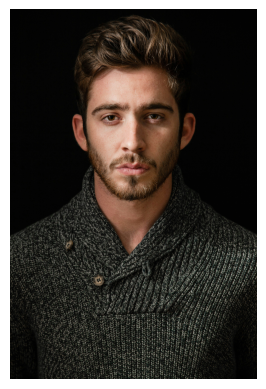

In [ ]:
# โหลดภาพใหม่จาก Unsplash
!wget https://images.unsplash.com/photo-1506794778202-cad84cf45f1d -O test.jpg

# อ่านและแสดงภาพ
import matplotlib.pyplot as plt
img = plt.imread("/content/test.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

# ตรวจจับอารมณ์
from fer import FER
detector = FER(mtcnn=True)
emotion, score = detector.top_emotion(img)
print(f"อารมณ์หลัก: {emotion} (score={score:.2f})")


In [ ]:
# # โหลดภาพใหม่จาก Unsplash
# # !wget https://images.unsplash.com/photo-1506794778202-cad84cf45f1d -O test.jpg

# # อ่านและแสดงภาพ
# import matplotlib.pyplot as plt
# img = plt.imread("/content/Screenshot 2025-11-11 161814.png").convert("RGB")
# plt.imshow(img)
# plt.axis('off')
# plt.show()

# # ตรวจจับอารมณ์
# from fer import FER
# detector = FER(mtcnn=True)
# emotion, score = detector.top_emotion(img)
# print(f"emotion: {emotion} (score={score:.2f})")


In [ ]:
# from PIL import Image
# import numpy as np

# # แปลงเป็น RGB
# img = Image.open("/content/test.jpg").convert("RGB")
# img = np.array(img)

# # ตรวจสอบ shape
# print(img.shape)  # ต้องเป็น (H, W, 3)

# # ใช้งาน FER ต่อ
# from fer import FER
# detector = FER(mtcnn=True)
# emotion, score = detector.top_emotion(img)
# print(f"Emotion: {emotion} (score={score:.2f})")


In [2]:
import cv2
from fer import FER

cap = cv2.VideoCapture(0)
detector = FER(mtcnn=True)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    emotion, score = detector.top_emotion(frame)
    print(f"Detected: {emotion} ({score:.2f})")


In [3]:
from google.colab import output
from IPython.display import display, Javascript
import cv2
from fer import FER
import numpy as np
from PIL import Image

detector = FER(mtcnn=True)

def capture_image():
    from google.colab.output import eval_js
    js = Javascript('''
    async function takePhoto() {
      const div = document.createElement('div');
      const video = document.createElement('video');
      const canvas = document.createElement('canvas');
      const ctx = canvas.getContext('2d');
      div.appendChild(video);
      document.body.appendChild(div);
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await video.play();
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      ctx.drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      return canvas.toDataURL('image/jpeg', 0.8);
    }
    ''')
    data = eval_js('takePhoto()')
    return data


In [4]:
capture_image()

MessageError: ReferenceError: takePhoto is not defined

# Image detect

In [6]:
from google.colab import output
from IPython.display import display, Javascript
import cv2
import numpy as np
from PIL import Image
import io
import base64
from fer import FER

detector = FER(mtcnn=True)

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const video = document.createElement('video');
      const button = document.createElement('button');
      button.textContent = 'Capture';
      div.appendChild(video);
      div.appendChild(button);
      document.body.appendChild(div);

      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await video.play();

      // Wait for user to click
      await new Promise((resolve) => button.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = output.eval_js('takePhoto(%f)' % quality)

    # Convert base64 to OpenCV image
    content = data.split(',')[1]
    decoded = base64.b64decode(content)
    img = Image.open(io.BytesIO(decoded))
    img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    cv2.imwrite(filename, img)
    return img

# use
img = take_photo()
emotion, score = detector.top_emotion(img)
print(f"Emotion: {emotion}, Score: {score:.2f}")


<IPython.core.display.Javascript object>

Emotion: happy, Score: 0.87


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_1']
Received: inputs=Tensor(shape=(1, 64, 64))
  warnings.warn(msg)


In [7]:
from google.colab import output
from IPython.display import display, Javascript
import cv2
import numpy as np
from PIL import Image
import io
import base64
from fer import FER
import time

detector = FER(mtcnn=True)

def take_photo(quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const video = document.createElement('video');
      const button = document.createElement('button');
      button.textContent = 'Capture';
      div.appendChild(video);
      div.appendChild(button);
      document.body.appendChild(div);

      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await video.play();

      await new Promise((resolve) => button.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = output.eval_js('takePhoto(%f)' % quality)
    content = data.split(',')[1]
    decoded = base64.b64decode(content)
    img = Image.open(io.BytesIO(decoded))
    img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    return img

# loop ถ่ายหลาย snapshots
frames = []
num_shots = 5
for i in range(num_shots):
    print(f"Take snapshot {i+1}/{num_shots}")
    img = take_photo()
    emotion, score = detector.top_emotion(img)
    print(f"Detected: {emotion} ({score:.2f})")
    frames.append((img, emotion))
    time.sleep(1)  # รอ 1 วินาทีระหว่าง snapshot

# แสดง snapshots + emotion
for idx, (img, emo) in enumerate(frames):
    cv2.imshow(f"{emo}", img)
    cv2.waitKey(1000)
cv2.destroyAllWindows()


Take snapshot 1/5


<IPython.core.display.Javascript object>

Detected: surprise (0.76)
Take snapshot 2/5


<IPython.core.display.Javascript object>

Detected: happy (0.49)
Take snapshot 3/5


<IPython.core.display.Javascript object>

Detected: neutral (0.41)
Take snapshot 4/5


<IPython.core.display.Javascript object>

Detected: surprise (0.90)
Take snapshot 5/5


<IPython.core.display.Javascript object>

Detected: neutral (0.72)


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


Take snapshot 1/5


<IPython.core.display.Javascript object>

Detected: neutral (0.87)
Take snapshot 2/5


<IPython.core.display.Javascript object>

No face detected
Take snapshot 3/5


<IPython.core.display.Javascript object>

Detected: neutral (0.57)
Take snapshot 4/5


<IPython.core.display.Javascript object>

Detected: angry (0.51)
Take snapshot 5/5


<IPython.core.display.Javascript object>

Detected: happy (0.75)


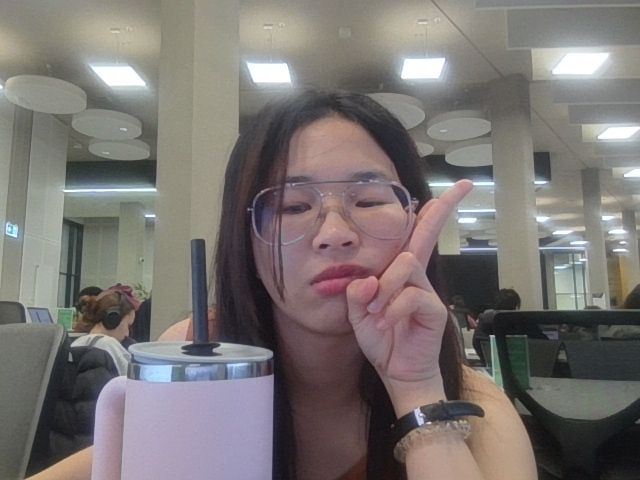

Snapshot 1: Emotion = neutral


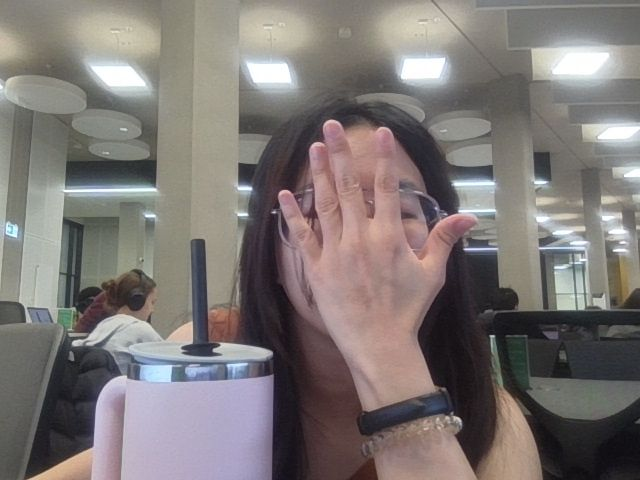

Snapshot 2: Emotion = Unknown


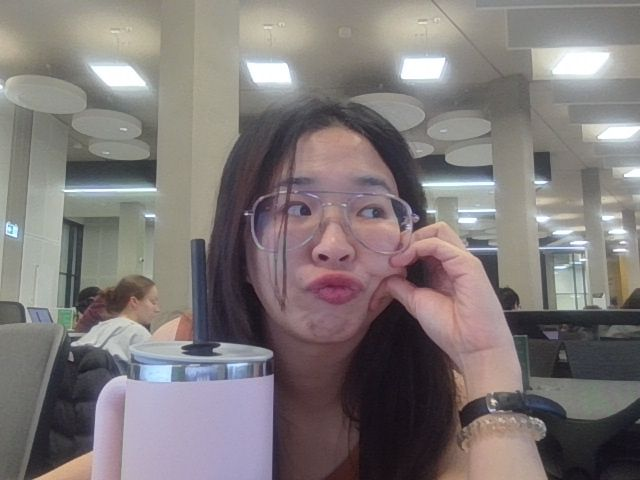

Snapshot 3: Emotion = neutral


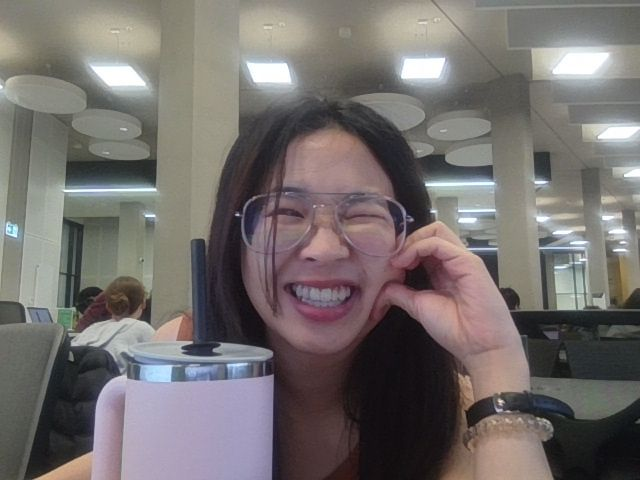

Snapshot 4: Emotion = angry


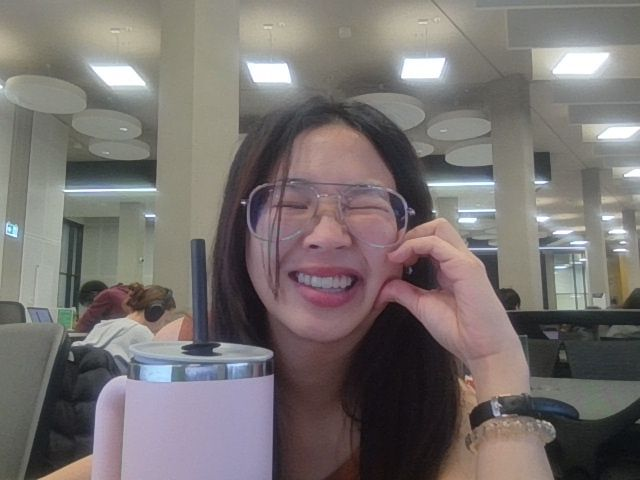

Snapshot 5: Emotion = happy


In [10]:
from google.colab import output
from IPython.display import display, Javascript
import cv2
import numpy as np
from PIL import Image
import io
import base64
from fer import FER
import time
from google.colab.patches import cv2_imshow  # ใช้แทน cv2.imshow
detector = FER(mtcnn=True)

def take_photo(quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const video = document.createElement('video');
      const button = document.createElement('button');
      button.textContent = 'Capture';
      div.appendChild(video);
      div.appendChild(button);
      document.body.appendChild(div);

      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await video.play();

      await new Promise((resolve) => button.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = output.eval_js('takePhoto(%f)' % quality)
    content = data.split(',')[1]
    decoded = base64.b64decode(content)
    img = Image.open(io.BytesIO(decoded))
    img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    return img

# loop ถ่ายหลาย snapshots
frames = []
num_shots = 5
for i in range(num_shots):
    print(f"Take snapshot {i+1}/{num_shots}")
    img = take_photo()
    emotion, score = detector.top_emotion(img)
    if emotion is None or score is None:
        print("No face detected")
        emotion = "Unknown"
        score = 0.0
    else:
        print(f"Detected: {emotion} ({score:.2f})")
    frames.append((img, emotion))
    time.sleep(1)  # รอ 1 วินาทีระหว่าง snapshot

# แสดง snapshots + emotion
# for idx, (img, emo) in enumerate(frames):
#     cv2.imshow(f"{emo}", img)
#     cv2.waitKey(1000)
for idx, (img, emo) in enumerate(frames):
    cv2_imshow(img)  # แสดงภาพ
    print(f"Snapshot {idx+1}: Emotion = {emo}")
cv2.destroyAllWindows()


Colab has limitations:

Real-time video streaming using a webcam is not possible in Colab because it cannot access the local camera.

This can be worked around by taking snapshots one by one.

On a local Python environment, real-time video streaming and emotion detection are fully supported.

# confidence rule

Take snapshot 1/5


<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_1']
Received: inputs=Tensor(shape=(2, 64, 64))
  warnings.warn(msg)


Detected: neutral (0.64)
Take snapshot 2/5


<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_1']
Received: inputs=Tensor(shape=(1, 64, 64))
  warnings.warn(msg)


Detected: neutral (0.70)
Take snapshot 3/5


<IPython.core.display.Javascript object>

Detected: happy (0.57)
Take snapshot 4/5


<IPython.core.display.Javascript object>

No face detected
Take snapshot 5/5


<IPython.core.display.Javascript object>

Detected: sad (0.59)


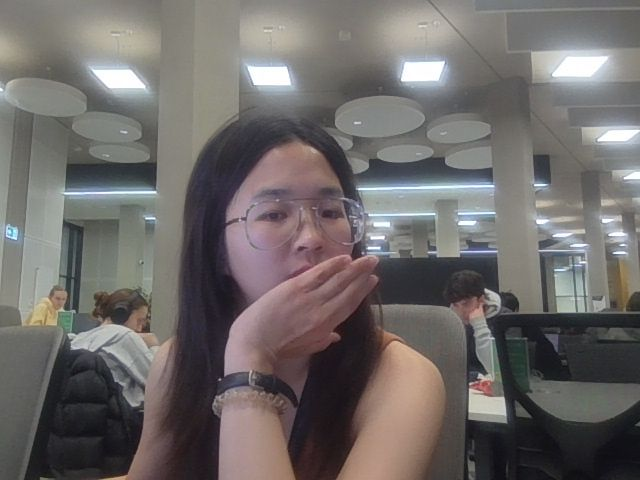

Snapshot 1: Emotion = neutral


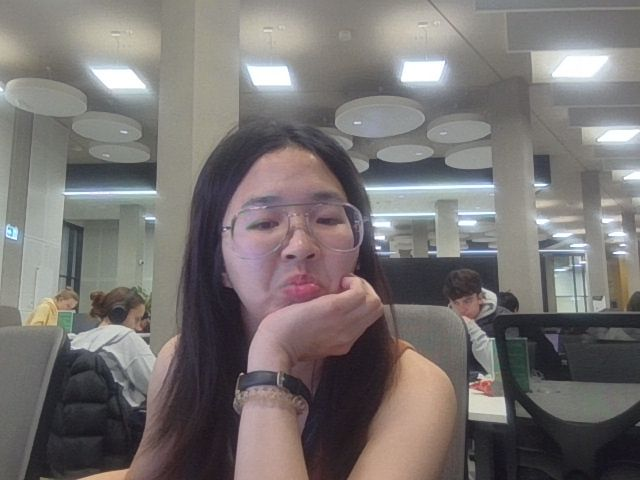

Snapshot 2: Emotion = neutral


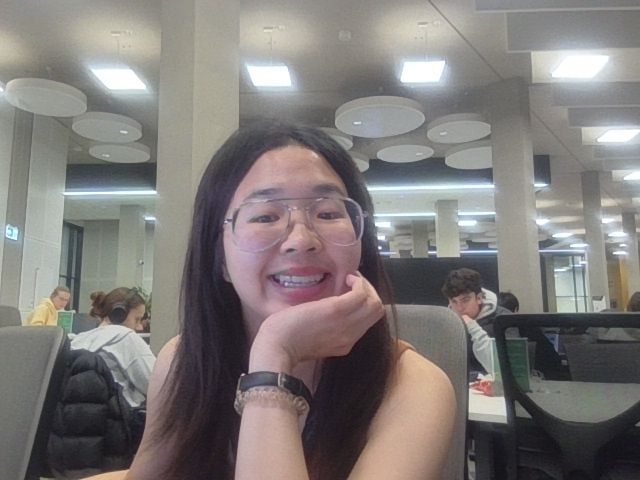

Snapshot 3: Emotion = happy


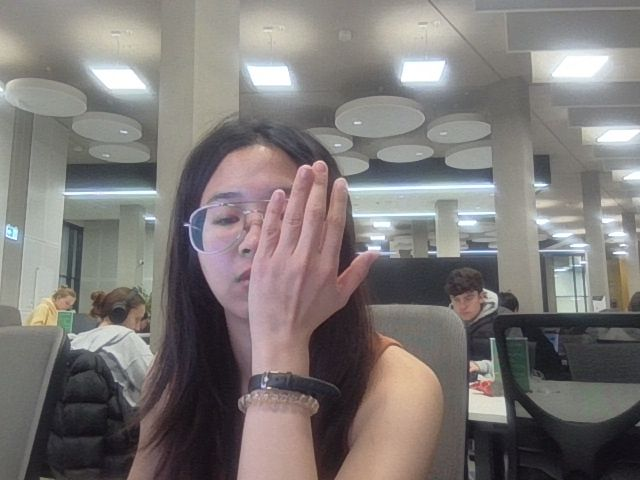

Snapshot 4: Emotion = Unknown


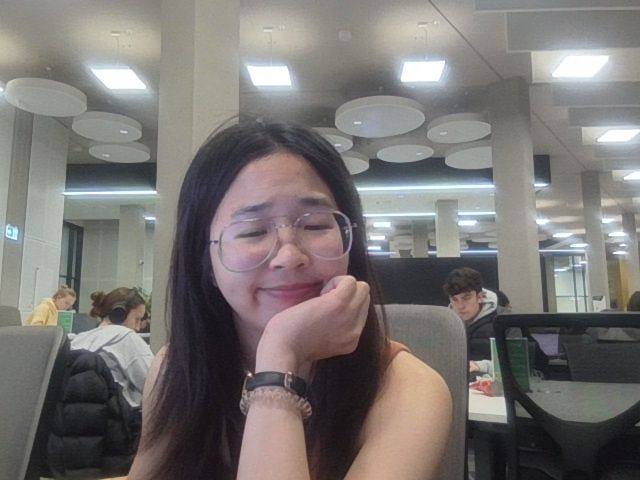

Snapshot 5: Emotion = sad


In [11]:
from google.colab import output
from IPython.display import display, Javascript
import cv2
import numpy as np
from PIL import Image
import io
import base64
from fer import FER
import time
from google.colab.patches import cv2_imshow  # ใช้แทน cv2.imshow
detector = FER(mtcnn=True)

def take_photo(quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const video = document.createElement('video');
      const button = document.createElement('button');
      button.textContent = 'Capture';
      div.appendChild(video);
      div.appendChild(button);
      document.body.appendChild(div);

      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await video.play();

      await new Promise((resolve) => button.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = output.eval_js('takePhoto(%f)' % quality)
    content = data.split(',')[1]
    decoded = base64.b64decode(content)
    img = Image.open(io.BytesIO(decoded))
    img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    return img

# loop ถ่ายหลาย snapshots
frames = []
num_shots = 5
for i in range(num_shots):
    print(f"Take snapshot {i+1}/{num_shots}")
    img = take_photo()
    emotion, score = detector.top_emotion(img)
    if (emotion is None or score is None) or (score < 0.5):
        print("No face detected")
        emotion = "Unknown"
        score = 0.0
    else:
        print(f"Detected: {emotion} ({score:.2f})")
    frames.append((img, emotion))
    time.sleep(1)  # รอ 1 วินาทีระหว่าง snapshot

# แสดง snapshots + emotion
# for idx, (img, emo) in enumerate(frames):
#     cv2.imshow(f"{emo}", img)
#     cv2.waitKey(1000)
for idx, (img, emo) in enumerate(frames):
    cv2_imshow(img)  # แสดงภาพ
    print(f"Snapshot {idx+1}: Emotion = {emo}")
cv2.destroyAllWindows()
